# Machine Learning
## Regressions
### Linear Regression
* Essentially fitting a straight line to a set of observations
* The line enables you to predict other/future observations based on the ones you've already got (either by sight or using the equation of the line)
* "Ordinary Least Squares" is the method used to determine the regression line and this essentially uses an algorithm to determine a line which results in the least variance between the line values and the observation values
* The r-squared value is the metric used to determine how well your regression line fits your data, it ranges between 0 and 1, the closer it is to 1, the better the fit

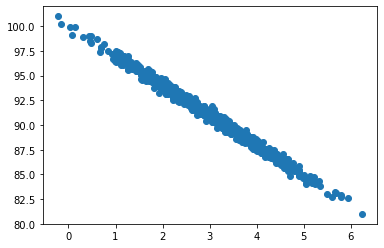

In [13]:
# load libs
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# generate data with linear relationship
pageSpeeds = np.random.normal(3.0, 1.0, 1000)
purchaseAmount = 100 - (pageSpeeds + np.random.normal(0, 0.1, 1000)) * 3

# scatter chart of data
plt.scatter(pageSpeeds, purchaseAmount)

In [14]:
# load libs
from scipy import stats

# linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(pageSpeeds, purchaseAmount)

Because we've created an almost perfect linear relationship, our r squared value is almost exactly 1, showing a very strong linear relationship

In [15]:
r_value ** 2

0.9903441844331443

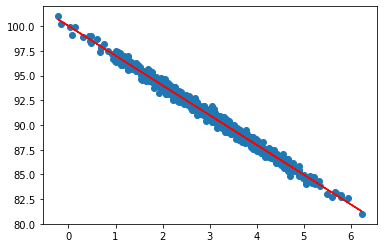

In [16]:
# function to draw best fit line (y=mx+c)
def predict(x):
    return slope * x + intercept

# build line from data
fitLine = predict(pageSpeeds)

# scatter plot of data and line
plt.scatter(pageSpeeds, purchaseAmount)
plt.plot(pageSpeeds, fitLine, c='r')
plt.show()

### Polynomial Regressions
* Whereas linear regressions use straight lines and single order functions (i.e. no powers greater than 1 in the line equation), polynomial regressions use higher powers in their fitting models
* A second degree regression uses power 2 values (e.g. instead of y=ax+b, it would be y=ax2+bx+c), third degree uses power 3 (y=ax3+bx2+cx+d) and so on
* The more powers, the more curvy the best fit line and the more tightly fitted to the observations the line
* In general, you want to fit your line without over-fitting it, because if you over-fit (e.g. using loads of powers e.g. 20) then your line may perfectly fit your observations but it would be a poor predicter of future values, so a balance is needed
* Again, the r squared value is used as a measure of fit

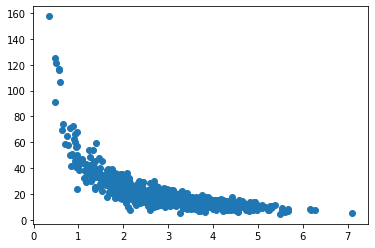

In [18]:
# generate data that isn't linearly related (via division)
np.random.seed(2) # ensure consistent numbers
pageSpeeds = np.random.normal(3.0, 1.0, 1000)
purchaseAmount = np.random.normal(50.0, 10.0, 1000) / pageSpeeds

# plot data
plt.scatter(pageSpeeds, purchaseAmount)

In [45]:
# get x and y values in arrays
x = np.array(pageSpeeds)
y = np.array(purchaseAmount)

# polyfit method creates line/curve specifying a 4th degree polynomial
pf = np.poly1d(np.polyfit(x, y, 4)) # poly1d is a plot for polynomials

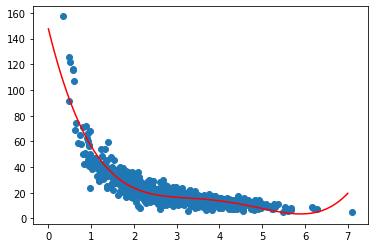

In [46]:
# plot above model
xp = np.linspace(0, 7, 100) # generate 100 evenly spaced numbers between 0 and 7
plt.scatter(x, y) # scatter plot above model data
plt.plot(xp, pf(xp), c='r') # add line between 0 and 7 using 4th degree polyn.
plt.show()

The above curve doesn't appear to be too over-fitted because it's not chasing every little point, it's gently curving in major areas to follow the best fit of the data

We can check the r squared error below for confirmation (82% isn't bad at all, although could be higher, looks like it's losing accuracy at either end of the tail)

In [47]:
# load libs
from sklearn.metrics import r2_score

# check r squared score
r2 = r2_score(y, pf(x)) # shows us r squared using observations and predictions
print(r2)

0.8293766396303073


### Multiple Regression
* Not as complex as it sounds, multiple regressions simply means using multiple features (i.e. variables) to predict your outcome value instead of just one variable
* So instead of looking at height as a predictor of weight, we could look at height, age, gender, social class etc. to predict weight
* Note that multi-variant regression is slightly different, as well as using multiple features, it also predicts multiple output variables (e.g. predicts weight, shoe size, eye colour etc. rather than just one thing)
* Still used OLS (ordinary least squared) and r squared to fit the line/curve
* It works by creating coefficient values for each of the feature variables (e.g. if you're looking at age, height and gender, it gives a value to each of these to say how much each variable affects the outcome value)
* It's best if coefficients are normalised so that they can be directly compared, otherwise they can be confusing or inaccurate
* If you spot features which have low coefficients and don't appear to affect your outcome variable, you can drop these from your analysis/predictor model and this is part of feature selection

In [49]:
# load libs
import pandas as pd

# load data
df = pd.read_excel('http://cdn.sundog-soft.com/Udemy/DataScience/cars.xls')

In [50]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


                     Mileage         Price
Mileage                                   
(0, 10000]       5588.629630  24096.714451
(10000, 20000]  15898.496183  21955.979607
(20000, 30000]  24114.407104  20278.606252
(30000, 40000]  33610.338710  19463.670267


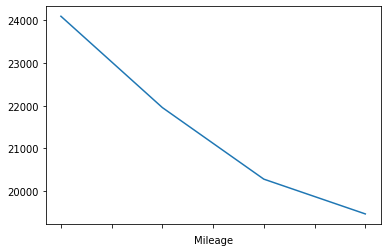

In [55]:
df1 = df[['Mileage', 'Price']] # extract 2 vars only
bins = np.arange(0,50000,10000) # start stop, step (0 to 50k in 10k jumps)
groups = df1.groupby(pd.cut(df1['Mileage'], bins)).mean() # get mean mileage for each bin
print(groups.head()) # peak at data
groups['Price'].plot.line() # plot data

In [57]:
# load libs
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
scale = StandardScaler() # convert mileages, cylinder values and door values into normalised values

# features (in upper case) used as predictors
X = df[['Mileage', 'Cylinder', 'Doors']]

# value to be measured and predicted
y = df['Price']

# scale used to normalise values into coefficients that can be directly compared
X[['Mileage', 'Cylinder', 'Doors']] = scale.fit_transform(X[['Mileage', 'Cylinder', 'Doors']].to_numpy())

# look at model
print(x)

# build model
est = sm.OLS(y, X).fit()

# summarise values from above model
est.summary()

[2.58324215 2.94373317 0.8638039  4.64027081 1.20656441 2.15825263
 3.50288142 1.75471191 1.94204778 2.09099239 3.55145404 5.29220801
 3.04153939 1.88207455 3.53905832 2.4038403  2.9808695  4.17500122
 2.25212905 3.00902525 2.12189211 2.84356583 3.25657045 2.01122095
 2.66117803 2.76381597 2.36234499 1.81238771 1.57878277 2.8465048
 2.73094304 5.23136679 0.56523242 3.1127265  3.37044454 4.35963386
 3.50185721 2.1557863  3.00000976 3.54235257 2.6864918  3.77101174
 1.13190935 4.73118467 4.46767801 2.66432266 3.61134078 3.04797059
 2.17086471 3.08771022 4.00036589 2.61890748 2.62433058 2.92552924
 3.43349633 4.27837923 2.36532069 3.50839624 3.21611601 1.14138761
 2.58068352 2.8676711  2.96042976 3.32600343 0.95967695 3.04625552
 2.32232442 1.56056097 3.52429643 3.73527958 2.34674973 3.84245628
 2.61848352 3.06648901 1.90126105 4.58448706 0.34055054 2.90854738
 3.69511961 0.96653345 2.81053074 2.92278133 3.82470301 4.24821292
 2.59610773 1.61548133 4.36723542 4.21788563 2.53799465 3.35088

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.064
Model:                            OLS   Adj. R-squared (uncentered):              0.060
Method:                 Least Squares   F-statistic:                              18.11
Date:                Tue, 21 Jul 2020   Prob (F-statistic):                    2.23e-11
Time:                        14:38:54   Log-Likelihood:                         -9207.1
No. Observations:                 804   AIC:                                  1.842e+04
Df Residuals:                     801   BIC:                                  1.843e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Mileage    -1272.3412    804.623     -1.581      0.114   -2851.759     307.077
Cylinder    5587.4472    804.509      6.945      0.000    4008.252    7166.642
Doors      -1404.5513    804.275     -1.746      0.081   -2983.288     174.185
==============================================================================
Omnibus:                      157.913   Durbin-Watson:                   0.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              257.529
Skew:                           1.278   Prob(JB):                     1.20e-56
Kurtosis:                       4.074   Cond. No.                         1.03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In the above print out, you can see in the 'coef' column the effect that each of the features is going to have on the price (if it's negative, then as the feature value increases, the output decreases and visa versa)

The above is a full scale investigation of features, we could do something simpler in some cases (see below) by looking at e.g. mean output values for different values in our features and see if this lets us elminate things right off the bat

In [59]:
# y is price, therefore get mean price for each doors value
y.groupby(df.Doors).mean()

Doors
2    23807.135520
4    20580.670749
Name: Price, dtype: float64

Interestingly the above shows us that the more doors, the lower the price which is not what you'd expect and also shows that doors aren't necessarily a good predictor for price

We can now make an actual prediction

In [60]:
# create a dummy car and scale the values to normalise
scaled = scale.transform([[45000, 8, 4]])
print(scaled)

# make a prediction of price based on our dummy car
predicted = est.predict(scaled[0])
print(predicted)

[[3.07256589 1.96971667 0.55627894]]
[6315.01330583]


### Multi-Level Models
* This is basically where you have to consider the fact that there are almost infinite interconnections between different variables in large, real world datasets that all influence each other and are related in more and less drastic ways depending on what you're looking at
* This is a huge, complex field and may not be something you ever have to concern yourself with, but it's worth being aware of

### Machine Learning: Supervised and Unsupervised
* Unsupervised learning is where you build a model on input features but don't give it any answers/results. The downsides are that it will just find its own relationships which may bit a bit looser than if you knew what you were looking for, but if you don't know what you're looking for then it can find things you weren't expecting (latent variables) or couldn't predict (e.g. if you want to find relationships between movie ratings and didn't want to impose your own biases)
* Supervised learning is where you provide both inputs and outputs (features and labels) so that you can build a model based with it knowing what it's looking for
* You can split your supervised learning data into train (features and labels) and test (just features) so that you can build a model on your train data and then test its accuracy by predicting the labels on the test data and comparing it to the actual labels
* When doing test/train splits you have to:
    * Make sure your sample sizes are big enough (i.e. represents the outliers, trends etc. of the real data)
    * Select your train/test splits randomly to ensure no bias
* You can use k-fold cross validation to do a number of test/train splits and then take the average best model from all k models, this ensures you're not using a single model which may have bias or overfitting included
* All of the above is a good way to prevent overfitting of your model in general

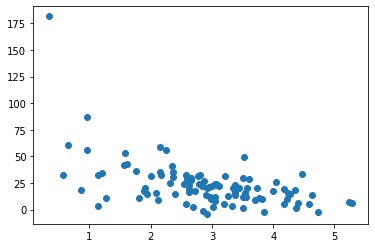

In [1]:
# load libs
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# seed data
np.random.seed(2)

# create data (related in ~exponential nature)
pageSpeeds = np.random.normal(3.0, 1.0, 100)
purchaseAmount = np.random.normal(50.0, 30.0, 100) / pageSpeeds

# plot in scatter chart
plt.scatter(pageSpeeds, purchaseAmount)

* We'll now split this data into train and test sets (80:20 is a good general rule)
* The above data is already random because of how it was generated, but in the real world we'd want to shuffle our data before selecting to ensure it's randomly selected
* We can do this in several ways:
    * random.shuffle()
    * pandas has many ways of doing this

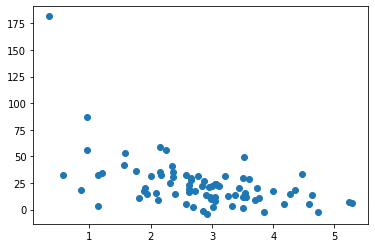

In [3]:
# extract X splits
trainX = pageSpeeds[:80]
testX = pageSpeeds[80:]

# extract y splits
trainY = purchaseAmount[:80]
testY = purchaseAmount[80:]

# plot training data
plt.scatter(trainX, trainY)

* Training data looks good as it roughly follows the same pattern as the original dataset
* In the real world we'd probably want more than 100 data points for a good model but this is just an example

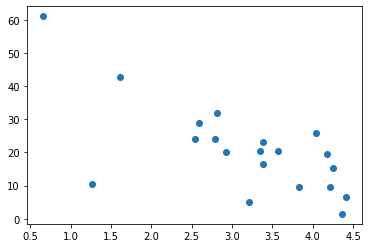

In [4]:
# plot test data
plt.scatter(testX, testY)

* Let's pick a high order polynomial regression line to begin with as we know this will likely overfit and we can rein it in from there

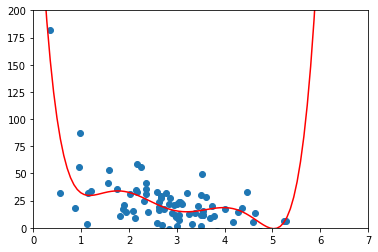

In [18]:
# define x and y variables as training data
x = np.array(trainX)
y = np.array(trainY)

# polynomial regression of 8th order fit to training data
pf = np.poly1d(np.polyfit(x, y, 6))

# plot regression line over training data
xp = np.linspace(0, 7, 100) # define range for regression line to be plotted
axes = plt.axes() # extract axes as object
axes.set_xlim([0, 7]) # set x and y limits (based on above data)
axes.set_ylim([0, 200])
plt.scatter(x, y) # scatter training data
plt.plot(xp, pf(xp), c='r') # plot regression line in red
plt.show() # plot chart

* The above is clearly overfitting as it follows our training data very well but would likely be a poor predictor of real, new data
* Below our test data looks much the same, again following the few data points very tightly

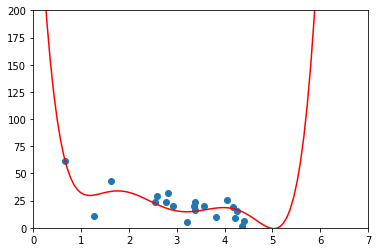

In [19]:
# do the same for test data
testx = np.array(testX)
testy = np.array(testY)

# plot regression line over training data
axes = plt.axes() # extract axes as object
axes.set_xlim([0, 7]) # set x and y limits (based on above data)
axes.set_ylim([0, 200])
plt.scatter(testx, testy) # scatter training data
plt.plot(xp, pf(xp), c='r') # plot regression line in red
plt.show() # plot chart

* The test data is poor as the r squared score is very low, much lower than the train data which also has a pretty low score itself

In [20]:
# load libs
from sklearn.metrics import r2_score

# test r squared score of test y values against regression line predicted x
r2 = r2_score(testy, pf(testx))

# show score
print(r2)

0.6050119470355618


In [21]:
# train r squared score of train y values against regression line predicted x
r2 = r2_score(np.array(trainY), pf(np.array(trainX)))

# show score
print(r2)

0.6025441707110506


### Naive Bayes
* Bayes' method is a way of analysing conditional probability, we used it earlier to assess the probability of being a drug user and testing positively in a drug test are related
* Naive Bayes' is a method used commonly in things like spam email detection, it looks at multiple input features and uses them to predict the labels
* For example, if you're looking at data where you have the text of an email body and then whether or not it's spam or ham (i.e. spam or not) then you can use Naive Bayes' algorithm to determine the relationship between email text and likelihood of spam, such as containing the word 'free' and any other words which are commonly found in spam emails
* It's called 'naive' because it assumes there aren't any inter-relationships between the feature variables, and solely looks at the relationship between feature and label values

In [46]:
# load libs
import os
import io
import numpy as np
import pandas as pd
from pandas import DataFrame
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# read message from file paths
def readFiles(path):
    # get all files in directory
    for root, dirnames, filenames in os.walk(path):
        for filename in filenames:
            path = os.path.join(root, filename)
            
            # skip header and go straight to text, extract message and path
            inBody = False
            lines = []
            f = io.open(path, 'r', encoding='latin1')
            for line in f:
                if inBody:
                    lines.append(line)
                elif line == '\n':
                    inBody = True
            f.close()
            message = '\n'.join(lines)
            yield path, message
            
# go into path and extract message and class
def dataFrameFromDirectory(path, classification):
    rows = []
    index = []
    for filename, message in readFiles(path):
        rows.append({'message':message, 'class':classification})
        index.append(filename)
        
    return DataFrame(rows, index=index)

# dataframe of 2 columns (text of email and class (SPAM or HAM))
data = DataFrame({'message':[], 'class':[]})

# populate with spam and ham data
data = data.append(dataFrameFromDirectory('C:/Users/Matthew.Allen2/Desktop/Data Science/emails/spam', 'spam'))
data = data.append(dataFrameFromDirectory('C:/Users/Matthew.Allen2/Desktop/Data Science/emails/ham', 'ham'))

# peak at data
data.head()

,message,class
C:/Users/Matthew.Allen2/Desktop/Data Science/emails/spam\00001.7848dde101aa985090474a91ec93fcf0,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",spam
C:/Users/Matthew.Allen2/Desktop/Data Science/emails/spam\00002.d94f1b97e48ed3b553b3508d116e6a09,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,spam
C:/Users/Matthew.Allen2/Desktop/Data Science/emails/spam\00003.2ee33bc6eacdb11f38d052c44819ba6c,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,spam
C:/Users/Matthew.Allen2/Desktop/Data Science/emails/spam\00004.eac8de8d759b7e74154f142194282724,##############################################...,spam
C:/Users/Matthew.Allen2/Desktop/Data Science/emails/spam\00005.57696a39d7d84318ce497886896bf90d,I thought you might like these:\n\n1) Slim Dow...,spam


In [47]:
# get vectorizer object
vectorizer = CountVectorizer()

# take all values from message and tokenize/convert words into numbers
# this allows count of each text work in a numerical method
counts = vectorizer.fit_transform(data['message'].values)

# get naive bayes object (for multinomial/input model)
classifier = MultinomialNB()

# get values of classes
targets = data['class'].values

# build a model that can predict whether or not the message body is spam or not
classifier.fit(counts, targets)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [48]:
# create 2 example emails
examples = ['FREE VIAGRA NOW!!!', 'Hi Bob, how about a game of golf tomorrow?']

# convert text into value counts
example_counts = vectorizer.transform(examples)

# make predictions using model on examples
predictions = classifier.predict(example_counts)
predictions

array(['spam', 'ham'], dtype='<U4')

* The above is a quick and easy method to just build a classifier model on the whole dataset and then give it two examples
* Instead, I will now use a few custom methods to split the input data (i.e. spam and ham emails) into train and test data and then tune my model on these to improve the accuracy and avoid over-fitting

In [51]:
# get data
df = data.copy()

# split out train and test data
mask = np.random.rand(len(df)) < 0.8 # randomly extract 80% of df indexes
train = df[mask] # select random 80% of df
test = df[~mask] # select random 20% of df 

# check length of train and test
print("Train Length: " + str(len(train)))
print("Test Length: " + str(len(test)))

# build model on train data
counts = vectorizer.fit_transform(train['message'].values) # get numerical counts of each word
targets = train['class'].values # get class (spam or ham) of each message
classifier.fit(counts, targets) # build model on train data

# test on test data
examples = test['message'].values # get mesasges from test data
example_counts = vectorizer.transform(examples) # tokenize words into numbers and count
predictions = classifier.predict(example_counts) # predict spam/ham of test data
#print(predictions) # check results

Train Length: 2387
Test Length: 589


In [50]:
# check results (message vs class)
results = zip(examples, predictions)
for i in results:
    print(i)

('A POWERHOUSE GIFTING PROGRAM You Don\'t Want To Miss! \n\n \n\n  GET IN WITH THE FOUNDERS! \n\nThe MAJOR PLAYERS are on This ONE\n\nFor ONCE be where the PlayerS are\n\nThis is YOUR Private Invitation\n\n\n\nEXPERTS ARE CALLING THIS THE FASTEST WAY \n\nTO HUGE CASH FLOW EVER CONCEIVED\n\nLeverage $1,000 into $50,000 Over and Over Again\n\n\n\nTHE QUESTION HERE IS:\n\nYOU EITHER WANT TO BE WEALTHY \n\nOR YOU DON\'T!!!\n\nWHICH ONE ARE YOU?\n\nI am tossing you a financial lifeline and for your sake I \n\nHope you GRAB onto it and hold on tight For the Ride of youR life!\n\n\n\nTestimonials\n\n\n\nHear what average people are doing their first few days:\n\n\x93We\'ve received 8,000 in 1 day and we are doing that over and over again!\' Q.S. in AL\n\n \x93I\'m a single mother in FL and I\'ve received 12,000 in the last 4 days.\x94 D. S. in FL\n\n\x93I was not sure about this when I sent off my $1,000 pledge, but I got back $2,000 the very next day!\x94 L.L. in KY\n\n\x93I didn\'t have the

### K-Means Clustering
* This is a method of splitting your data into 'k' number of clusters (so a categorisation algorithm)
* It is an unsupervised method that determines its own clusters based on its own logic (i.e. you're not telling it what to cluster the data into)
* It works by randomly dropping down centroids (data points, the # of centroids  = k), assigning the nearest points to the nearest centroids, checking the distances between your data points and centroids and then re-iterating this process until it's happy the centroids are evenly representing each cluster (based on parameters you've tuned)
* Issues with k-means clustering include:
    * You must decide how many clusters to use
    * You must decide what to label the clusters
    * You should normalise the data before clustering because if you're comparing e.g. age to income directly then the numerical values of these are going to be hugely different
    * You should run multiple models on the same data to ensure your first model isn't accidentally getting stuck on bad centroids (e.g. if they're dumped in places that make them think they're accurate initially but aren't)
*  In the below example we're simply looking at 2 variables (age and income) and then saying, when we scatter this data, which people fall into which clusters (and then you could label these as you wish e.g. old and rich, young and hopeless, early flyers, lowly aged etc.)

In [54]:
# create fake data (N is people/sample/data points, k is cluster amount)
def createClusteredData(N, k):
    np.random.seed(10) # seed randomness
    pointsPerCluster = float(N)/k # get average # of points per cluster based on sample size and desired # of clusters
    X = [] # emtpy list for features initially
    for i in range(k): # iterate through clusters and build random points around cluster (i.e. faking clusters at random)
        incomeCentroid = np.random.uniform(20000.0, 2000000.0) # random # between values for income centroid starting point
        ageCentroid = np.random.uniform(20.0, 70.0) # same as above for age starting point
        for j in range(int(pointsPerCluster)): # iterate through each point
            X.append([np.random.normal(incomeCentroid, 10000.0),
                      np.random.normal(ageCentroid, 2.0)]) # create random point in range
    
    # convert into array
    X = np.array(X)
    
    # return data point
    return X

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


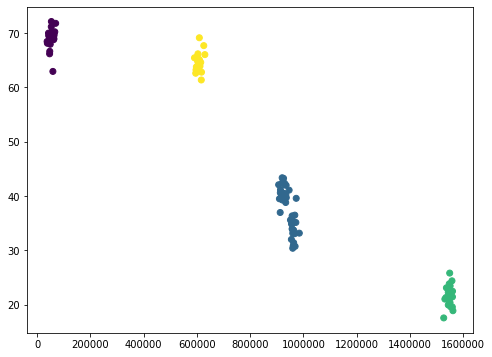

In [65]:
# load libs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

# create dataset with 5 clusters and 100 people using above method
data = createClusteredData(100, 5)

# build model object
model = KMeans(n_clusters=4)

# scale data to normalise it (otherwise funky results!)
# then fit it to KMeans model with 5 clusters
model = model.fit(scale(data))

# check data points assignment to each cluster
print(model.labels_)

# visualise results
plt.figure(figsize=(8, 6))
plt.scatter(data[:,0], data[:,1], c=model.labels_.astype(np.float))
plt.show()

### Entropy
* Very basic, entropy is a measure of disorder in your data
* For example, if your sample is 10 animals and one field in your data is species, if all 10 of your animals are rabbits then your entropy for that variable is very low (0) because they're all the same. Whereas if you had 10 different animals, your entropy would be very high (1) because there is the maximum amount of variation in this variable

### Decision Trees
* NOTE: GraphViz is a package that displays decision trees, this is already installed via the Anaconda package but just worth noting that this is driving the below visualisations

* Decision trees are supervised learning algorithms where you use multiple independent variables (features) to predict the value of the dependent variable (labels) using data with known answers first
* You essentially progress through a selection of variables from the input data and at each stage, make a decision on how to split the sample
* The decisions are made to reduce the entropy of the data to its lowest possible amount at the next stage (i.e. make the data as similar as possible in the selected variable)
* It's a greedy method which means it aims to reduce the entropy the most purely at the stage it's currently at, rather than considering how previous or future stages might be affected (this means the model isn't always optimised but will always work at least)
* Decision trees are prone to overfitting therefore you can use random forests:
    * These are 'random' because they randomly re-sample the input date each time (known as bagging or bootstrap aggregating) and also randomly take a subset of features to use at each decision point
    * They are known as forests because they re-iterate multiple versions of decision trees (using different combinations of the above randomised areas) and then each model 'votes' to determine the best features, parameters, sample etc. to use

In [83]:
# load libs
from sklearn import tree

# load data
input_file = 'C:/Users/Matthew.Allen2/Desktop/Data Science/PastHires.csv'
df = pd.read_csv(input_file, header = 0)

# peak at data
df.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,Y,4,BS,N,N,Y
1,0,N,0,BS,Y,Y,Y
2,7,N,6,BS,N,N,N
3,2,Y,1,MS,Y,N,Y
4,20,N,2,PhD,Y,N,N


In [84]:
# map text to values, otherwise model won't work
d = {'Y':1, 'N':0}
df['Hired'] = df['Hired'].map(d)
df['Employed?'] = df['Employed?'].map(d)
df['Top-tier school'] = df['Top-tier school'].map(d)
df['Interned'] = df['Interned'].map(d)
d = {'BS':0, 'MS':1, 'PhD':2}
df['Level of Education'] = df['Level of Education'].map(d)
df.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,1,4,0,0,0,1
1,0,0,0,0,1,1,1
2,7,0,6,0,0,0,0
3,2,1,1,1,1,0,1
4,20,0,2,2,1,0,0


In [86]:
# extract features (i.e. variables affecting output)
features = list(df.columns[:6])
features

['Years Experience',
 'Employed?',
 'Previous employers',
 'Level of Education',
 'Top-tier school',
 'Interned']

In [87]:
# extract features and labels
y = df['Hired']
X = df[features]

# build decision tree on data
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,y)

In [88]:
# load libs
from IPython.display import Image
from sklearn.externals.six import StringIO
import pydot

# boiler plate for visualising decision tree
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data,
                     feature_names=features)
graph = pydot.graph_from_dot_data(dot_data.getValue())
Image(graph.create_png)

ModuleNotFoundError: No module named 'pydot'

* Gini score is entropy (0 is none, i.e. all the same, 1 is loads, i.e. all different)
* Value shows you how many people were 0s or 1s based on your label field (if they're all of one value, then your leaf is perfect (i.e. 100% of people in that bucket are a 1 or a 0)
* Aim is to keep going until you reach an entropy of 0 at each leaf

In [92]:
# load libs
from sklearn.ensemble import RandomForestClassifier

# build classifier using 10 decision trees
clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X, y) # run the 10 decision trees on our data

# use model to predict specific case (numbers below relate to
# the features in our data (see above)), in this case
# we're looking at an employed 10 year veteran
print(clf.predict([[10, 1, 4, 0, 0, 0]]))

# vs. an unemployed 10 year veteran
print(clf.predict([[10, 0, 4, 0, 0, 0]]))

[1]
[0]


### Ensemble Learning
* Ensemble learning basically means using multiple models to get the best results (could be multiple versions of the same model type e.g. random forest, or a mix of other types)
* So many different ways to combine different models for best results:
    * Bagging (bootstrap aggregating) is where you run multiple models which take random samples and attributes from the data each time
    * Boosting is where each subsequent model identifies the weaknesses of the previous model and specifically improves those areas
    * Bucket of models is where you run multiple different models and take the best result
    * Stacking models is where you run multiple different models and combine the results to optimize the model overall
    
### Support Vector Machines (SVM)
* These are supervised learning systems which can complete either regression or categorisation analysis on higher dimensional data (i.e. computing more than 2 features when determining labels)
* They use a kernel method (i.e. the mathematical functions behind the scenes) to handle these complex processes and can be quite computationally expensive to run on big data

In [13]:
# load libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# create fake data (N is people/sample/data points, k is cluster amount)
def createClusteredData(N, k):
    np.random.seed(1234) # seed randomness
    pointsPerCluster = float(N)/k # get average # of points per cluster based on sample size and desired # of clusters
    X = [] # emtpy list for features initially
    y = [] # empty list for cluster count
    for i in range(k): # iterate through clusters and build random points around cluster (i.e. faking clusters at random)
        incomeCentroid = np.random.uniform(20000.0, 2000000.0) # random # between values for income centroid starting point
        ageCentroid = np.random.uniform(20.0, 70.0) # same as above for age starting point
        for j in range(int(pointsPerCluster)): # iterate through each point
            X.append([np.random.normal(incomeCentroid, 100000.0),
                      np.random.normal(ageCentroid, 2.0)]) # create random point in range
            y.append(i) # track cluster count
    
    # convert into array
    X = np.array(X)
    y = np.array(y)
    
    # return data point
    return X, y

* In the below code, SVC (support vector classifier) needs the data to be scaled in order to work, hence why we transform the coordinates to between -1 and 1
* Note that there is an inverse scaler method you can use to revert your data back to the original values (i.e. non-scaled data) if you need to do this

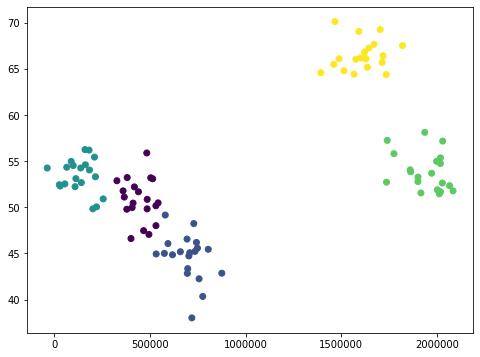

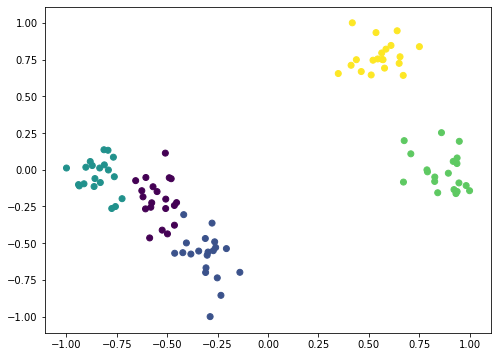

In [14]:
# load libs
from pylab import *
from sklearn.preprocessing import MinMaxScaler

# build clustered data from above method
(X, y) = createClusteredData(100, 5)

# plot data
plt.figure(figsize=(8, 6)) # define figure
plt.scatter(X[:,0], X[:,1], c=y.astype(np.float)) # extract x and y coordinates
plt.show()

# scale x and y values between -1 and 1
scaling = MinMaxScaler(feature_range=(-1, 1)).fit(X)
X = scaling.transform(X)

# plot new scaled/transformed data
plt.figure(figsize=(8, 6))
plt.scatter(X[:,0], X[:,1], c=y.astype(np.float)) # colour = cluster #
plt.show()

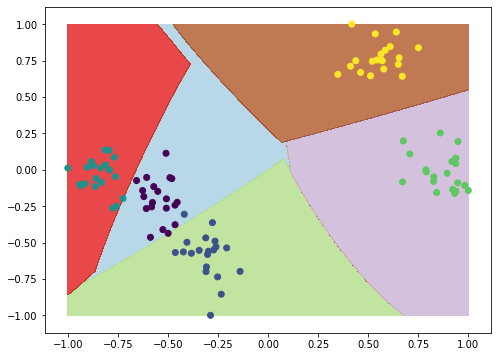

In [21]:
# load libs
from sklearn import svm, datasets

# train svc model on data
C = 1.0 # hyperparameter (1 is default)
svc = svm.SVC(kernel='rbf', C=C).fit(X, y) # use basic linear kernel and fit to features and labels

# plot clusters from above model
def plotPredictions(clf):
    # create dense grid of points to sample
    xx, yy = np.meshgrid(np.arange(-1, 1, .001),
                         np.arange(-1, 1, .001))
    
    # convert to numpy arrays
    npx = xx.ravel() # contiguous/touching array of values
    npy = yy.ravel()
    
    # convert to list of 2D (income, age) points
    samplePoints = np.c_[npx, npy] # concatenate i.e. make list of points [x, y]
    
    # generate predicted labels (cluster numbers) for each point
    Z = clf.predict(samplePoints)
    
    # plot data
    plt.figure(figsize=(8, 6))
    Z = Z.reshape(xx.shape) # reshape results to match xx dimension
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8) # draw contour
    plt.scatter(X[:,0], X[:,1], c=y.astype(np.float)) # draw points
    plt.show()
    
# predict data
plotPredictions(svc)

In [20]:
# you can then make predictions using specific data values
print(svc.predict(scaling.transform([[200000,40]])))

[1]


Within SVM and SVC there are quite a few hyperparameters and kernels to tune and adjust, below are some of the definitions of these things:
* C is the regularisation parameter, it is used to determine how tightly your classification lines fit your data. Higher values of C mean fewer misclassifications because the hyperplanes will be far closer to your data points leaving less error (i.e. over-fitting), whilst lower values will result in more errors but a looser, potentially better fit for real data (i.e. under-fitted)
* Kernals are the collection of mathematical functions used to classify for an SVM model. They work by calculating the inner dot product between two points to identify their similarity (an efficient method of classifying, even for higher dimensional data). There are different types, better suited for different scenarios:
    * Polynomial (good for image processing, handles multiple degrees)
    * Gaussian (good for data you know nothing about)
    * RBF (Gaussian Radial Basis Function: good for no prior knowledge, the most commonly used method) (also have Laplace RBF which is similar)
    * Hyperbolic tangent (used in neural networks)
    * Sigmoid (proxy for neural networks)
    * Bessel function of the first kind (not sure!)
    * ANOVA radial basis (regression analysis)
    * Linear splines in 1D (good for sparse data for categorisation and regression)
* The polynomial and RBF kernels are good for data where a simple linear separation is not possible, you can literally draw islands around certain categories using some of these kernels
* You can enter a degree parameter (only if you're using a polynomial kernel) to specify the degree of the equation
* Gamma is a coefficient for rbg, poly and sigmoid kernels which defines how strongly each training example pulls/pushes the model (a low value reduces the influence/distance of reach of individual points on the model, whilst a high value means they act like far reaching, strong magnets for the model)
* There are a lpot of other parameters which all influcence specific kernels in different ways, they are worth researching when using a specific model, but for now the general overview is here: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
### Recommender Systems
There are 2 main types:
* User-based collaborative systems
    * Look at similarities between users in habits (i.e. these people viewed and rated similarly and behaved in similar ways)
    * Good in theory but has limitations in that people change their opinions and habits over time, some people setup profiles to game the system and make their own product match popular ones etc., also there are often far more people than products which can cause issues in processing (large sample size) and identifying actual patterns rather than chance occurrences etc.
* Item-based collaborative systems
    * Look at similarities between items/products (i.e. lots of people bought both or categorised both in the same way etc.)
    * Overcomes many of the issues with user-based collaborative systems by identifying patterns between products rather than people because it's harder to game the system with products (because it's tricky to simulate sales etc.)
    * You should also aim to score your item based systems on things like actual money spent because this is a very good indicator of product performance (rather than e.g. views which are easier to simulate)

In [32]:
# get data
r_cols = ['user_id', 'movie_id', 'rating']
ratings = pd.read_csv('C:/Users/Matthew.Allen2/Desktop/Data Science/ml-100k/u.data',
                      sep='\t', names=r_cols, usecols=range(3))

n_cols = ['movie_id', 'title']
movies = pd.read_csv('C:/Users/Matthew.Allen2/Desktop/Data Science/ml-100k/u.item',
                     sep='|', names=n_cols, usecols=range(2))

# merge dfs
ratings = pd.merge(movies, ratings)

# peak at data
ratings.head()

,movie_id,title,user_id,rating
0,1,Toy Story (1995),308,4
1,1,Toy Story (1995),287,5
2,1,Toy Story (1995),148,4
3,1,Toy Story (1995),280,4
4,1,Toy Story (1995),66,3


* Pandas 'pivot_table' method is a great way for showing dataframes in custom ways, in this example it creates a sparse matrix (lots of NaNs)

In [33]:
# pivot data to show rating by person and movie
movieRatings = ratings.pivot_table(index=['user_id'],
                                   columns=['title'],
                                   values='rating')

# peak at data
movieRatings.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
# extract star wars data only
starWarsRatings = movieRatings['Star Wars (1977)']
starWarsRatings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [35]:
# create a correlation table between star wars and other films
similarMovies = movieRatings.corrwith(starWarsRatings)

# drop movies with no correlation
similarMovies = similarMovies.dropna()

# convert to df and view
df = pd.DataFrame(similarMovies)
df.head(10)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,0
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
2 Days in the Valley (1996),0.066654
"20,000 Leagues Under the Sea (1954)",0.289768
2001: A Space Odyssey (1968),0.230884
"39 Steps, The (1935)",0.106453


* The below list shows that our method is wrong because it's returned a tonne of movies which are perfectly positively and negatively correlated to star wars, therefore we need to dig into our method a little better

In [38]:
# sort data to show top and bottom correlation
similarMovies.sort_values(ascending=True)

title
Frankie Starlight (1995)                 -1.0
Roseanna's Grave (For Roseanna) (1997)   -1.0
Two Deaths (1995)                        -1.0
I Like It Like That (1994)               -1.0
Theodore Rex (1995)                      -1.0
                                         ... 
Cosi (1996)                               1.0
Commandments (1997)                       1.0
Hollow Reed (1996)                        1.0
Man of the Year (1995)                    1.0
No Escape (1994)                          1.0
Length: 1410, dtype: float64

* We can check how many people have rated each movie and the average score, then we can make a decision to drop anything we deem not worthy of consideration
* In a full scale project there are methods of running tests to determine thresholds for what should and shouldn't be included, but in this case we'll just eyeball it

In [40]:
movieStats = ratings.groupby('title').agg({'rating':[np.size, np.mean]})
movieStats.head()

rating          
                            size      mean
title                                     
'Til There Was You (1997)      9  2.333333
1-900 (1994)                   5  2.600000
101 Dalmatians (1996)        109  2.908257
12 Angry Men (1957)          125  4.344000
187 (1997)                    41  3.024390

In [42]:
# extract movies with >100 ratings only
popularMovies = movieStats['rating']['size'] >= 100

# show rating and 
movieStats[popularMovies].sort_values([('rating', 'mean')], ascending=False)[:15]

rating          
                                         size      mean
title                                                  
Close Shave, A (1995)                     112  4.491071
Schindler's List (1993)                   298  4.466443
Wrong Trousers, The (1993)                118  4.466102
Casablanca (1942)                         243  4.456790
Shawshank Redemption, The (1994)          283  4.445230
Rear Window (1954)                        209  4.387560
Usual Suspects, The (1995)                267  4.385768
Star Wars (1977)                          584  4.359589
12 Angry Men (1957)                       125  4.344000
Citizen Kane (1941)                       198  4.292929
To Kill a Mockingbird (1962)              219  4.292237
One Flew Over the Cuckoo's Nest (1975)    264  4.291667
Silence of the Lambs, The (1991)          390  4.289744
North by Northwest (1959)                 179  4.284916
Godfather, The (1972)                     413  4.283293

In [43]:
# show only movies with >100 people and show similarity to star wars
df = movieStats[popularMovies].join(pd.DataFrame(similarMovies, columns=['similarity']))
df.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:618: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


,"(rating, size)","(rating, mean)",similarity
title,,,
101 Dalmatians (1996),109,2.908257,0.211132
12 Angry Men (1957),125,4.344000,0.184289
2001: A Space Odyssey (1968),259,3.969112,0.230884
Absolute Power (1997),127,3.370079,0.085440
"Abyss, The (1989)",151,3.589404,0.203709


In [44]:
# we'll now sort our new df and it looks a lot more sensible
df.sort_values(['similarity'], ascending=False)[:15]

,"(rating, size)","(rating, mean)",similarity
title,,,
Star Wars (1977),584,4.359589,1.000000
"Empire Strikes Back, The (1980)",368,4.206522,0.748353
Return of the Jedi (1983),507,4.007890,0.672556
Raiders of the Lost Ark (1981),420,4.252381,0.536117
Austin Powers: International Man of Mystery (1997),130,3.246154,0.377433
"Sting, The (1973)",241,4.058091,0.367538
Indiana Jones and the Last Crusade (1989),331,3.930514,0.350107
Pinocchio (1940),101,3.673267,0.347868
"Frighteners, The (1996)",115,3.234783,0.332729


### Item-Based Collaborative Filtering
Let's run the above process through for a full-scale piece of analysis to build a recommendation system for any individual

In [45]:
# get data
r_cols = ['user_id', 'movie_id', 'rating']
ratings = pd.read_csv('C:/Users/Matthew.Allen2/Desktop/Data Science/ml-100k/u.data',
                      sep='\t', names=r_cols, usecols=range(3))

n_cols = ['movie_id', 'title']
movies = pd.read_csv('C:/Users/Matthew.Allen2/Desktop/Data Science/ml-100k/u.item',
                     sep='|', names=n_cols, usecols=range(2))

# merge dfs
ratings = pd.merge(movies, ratings)

# peak at data
ratings.head()

,movie_id,title,user_id,rating
0,1,Toy Story (1995),308,4
1,1,Toy Story (1995),287,5
2,1,Toy Story (1995),148,4
3,1,Toy Story (1995),280,4
4,1,Toy Story (1995),66,3


In [47]:
# pivot to get ratings by person and movie
userRatings = ratings.pivot_table(index=['user_id'],
                                  columns=['title'],
                                  values='rating')

# show sparse matrix
userRatings.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
# build and show correlation matrix between movies
corrMatrix = userRatings.corr() # this is quite an expensive step to run
corrMatrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
title,,,,,,,,,,,,,,,,,,,,,
'Til There Was You (1997),1.0,NaN,-1.000000,-0.500000,-0.500000,0.522233,NaN,-0.426401,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1-900 (1994),NaN,1.0,NaN,NaN,NaN,NaN,NaN,-0.981981,NaN,NaN,...,NaN,NaN,NaN,-0.944911,NaN,NaN,NaN,NaN,NaN,NaN
101 Dalmatians (1996),-1.0,NaN,1.000000,-0.049890,0.269191,0.048973,0.266928,-0.043407,NaN,0.111111,...,NaN,-1.000000,NaN,0.158840,0.119234,0.680414,0.000000,0.707107,NaN,NaN
12 Angry Men (1957),-0.5,NaN,-0.049890,1.000000,0.666667,0.256625,0.274772,0.178848,NaN,0.457176,...,NaN,NaN,NaN,0.096546,0.068944,-0.361961,0.144338,1.000000,1.0,NaN
187 (1997),-0.5,NaN,0.269191,0.666667,1.000000,0.596644,NaN,-0.554700,NaN,1.000000,...,NaN,0.866025,NaN,0.455233,-0.500000,0.500000,0.475327,NaN,NaN,NaN


* We want to make sure the data we're looking at is on scores that are backed up by enough people that we can trust the data (i.e. exclude outliers)

In [49]:
# build matrix again but only for films with >100 viewers
corrMatrix = userRatings.corr(method='pearson', min_periods=100)
corrMatrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
title,,,,,,,,,,,,,,,,,,,,,
'Til There Was You (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1-900 (1994),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101 Dalmatians (1996),NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12 Angry Men (1957),NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187 (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
# create a fake user with fake movie scores
myRatings = userRatings.loc[0].dropna()
myRatings

title
Empire Strikes Back, The (1980)    5.0
Gone with the Wind (1939)          1.0
Star Wars (1977)                   5.0
Name: 0, dtype: float64

In [53]:
# create empty series
simCandidates = pd.Series()

# iterate through fake user scores
for i in range(0, len(myRatings.index)):
    # record progress
    print("Adding sims for " + myRatings.index[i] + "...")
    
    # extract other user's scores for rated movies
    sims = corrMatrix[myRatings.index[i]].dropna()
    
    # scale scores to fake user's scores
    sims = sims.map(lambda x: x * myRatings[i])
    
    # store scaled scores to list similarity of candidates
    simCandidates = simCandidates.append(sims)
    
# sort results
print("sorting...")
simCandidates.sort_values(inplace = True, ascending = False)
print(simCandidates.head(10))

Adding sims for Empire Strikes Back, The (1980)...
Adding sims for Gone with the Wind (1939)...
Adding sims for Star Wars (1977)...
sorting...
Empire Strikes Back, The (1980)                       5.000000
Star Wars (1977)                                      5.000000
Empire Strikes Back, The (1980)                       3.741763
Star Wars (1977)                                      3.741763
Return of the Jedi (1983)                             3.606146
Return of the Jedi (1983)                             3.362779
Raiders of the Lost Ark (1981)                        2.693297
Raiders of the Lost Ark (1981)                        2.680586
Austin Powers: International Man of Mystery (1997)    1.887164
Sting, The (1973)                                     1.837692
dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


In [54]:
# group all users/movies by overall similarity (no repeat occurrences)
simCandidates = simCandidates.groupby(simCandidates.index).sum()

# sort results and peak
simCandidates.sort_values(inplace=True, ascending=False)
simCandidates.head(10)

Empire Strikes Back, The (1980)              8.877450
Star Wars (1977)                             8.870971
Return of the Jedi (1983)                    7.178172
Raiders of the Lost Ark (1981)               5.519700
Indiana Jones and the Last Crusade (1989)    3.488028
Bridge on the River Kwai, The (1957)         3.366616
Back to the Future (1985)                    3.357941
Sting, The (1973)                            3.329843
Cinderella (1950)                            3.245412
Field of Dreams (1989)                       3.222311
dtype: float64

In [55]:
# filter out movies already rated
filteredSims = simCandidates.drop(myRatings.index)
filteredSims.head(10)

Return of the Jedi (1983)                    7.178172
Raiders of the Lost Ark (1981)               5.519700
Indiana Jones and the Last Crusade (1989)    3.488028
Bridge on the River Kwai, The (1957)         3.366616
Back to the Future (1985)                    3.357941
Sting, The (1973)                            3.329843
Cinderella (1950)                            3.245412
Field of Dreams (1989)                       3.222311
Wizard of Oz, The (1939)                     3.200268
Dumbo (1941)                                 2.981645
dtype: float64